In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("bank-full.csv", delimiter=";")


In [3]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


# Visualizing the distribution of the target variable

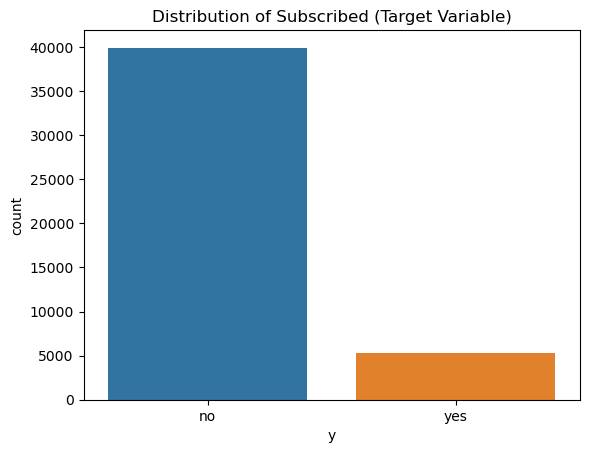

In [4]:
sns.countplot(x="y", data=data)
plt.title("Distribution of Subscribed (Target Variable)")
plt.show()


In [5]:
X = data.drop("y", axis=1)
y = data["y"]

# Split the Data into Training and Testing Sets

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Data Preprocessing (Handle missing values, encode categorical variables, etc.)

In [7]:


# Identify categorical columns
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

# One-hot encoding for categorical features
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns)

# Check for any remaining missing values
print(X_train_encoded.isnull().sum())




age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0


# Standardize the Features

In [8]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Build and Train the Logistic Regression Model

In [9]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

# Predictions and Evaluation

In [10]:


y_pred = model.predict(X_test_scaled)
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)


# Accuracy

In [11]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8987061815769103


In [12]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.98      0.94      7952
         yes       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



# Confusion Matrix 
Visualize Confusion Matrix

Confusion Matrix:
 [[7755  197]
 [ 719  372]]


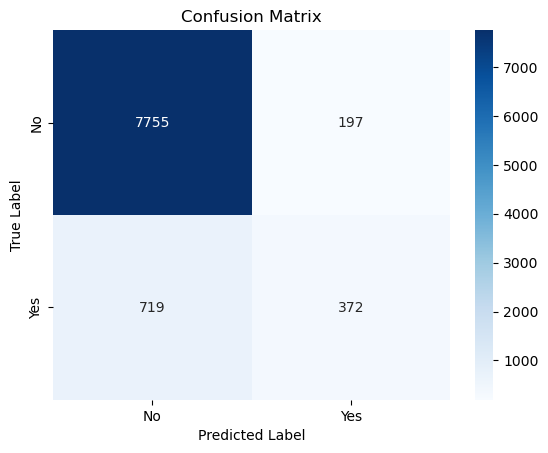

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualize ROC Curve

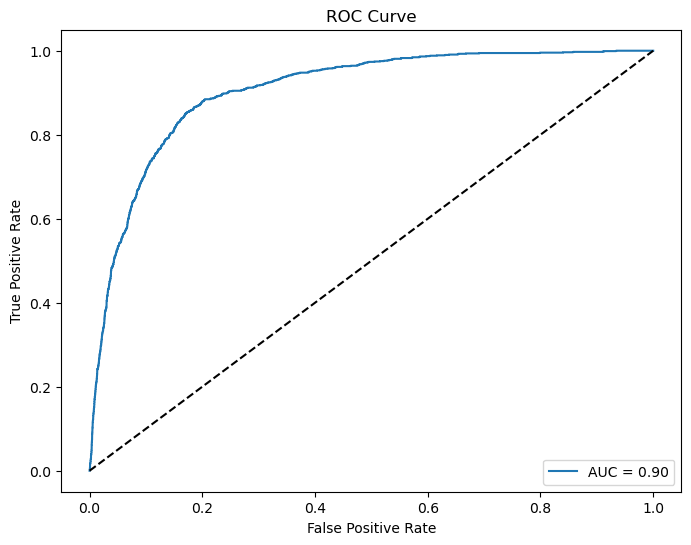

In [14]:

fpr, tpr, _ = roc_curve(y_test_binary, model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
